In [83]:
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

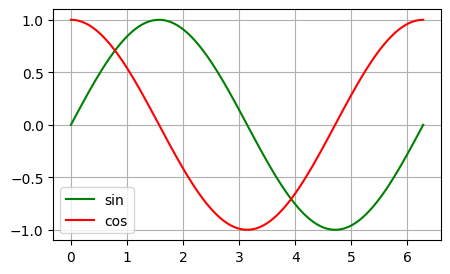

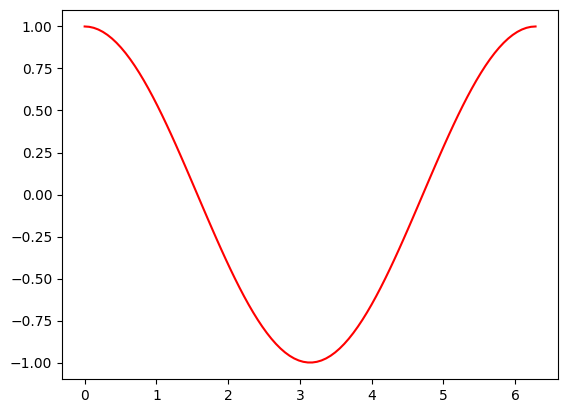

In [66]:
##figsize 画布大小，dpi画布清晰度
##注意 figsize一般是用来控制比例的 dpi用来控制大小
##facecolor 背景颜色
## 可以设置网格
plt.figure(figsize=(5,3),dpi=100,facecolor='w',edgecolor='k')
plt.grid(True)

x=np.linspace(0,2*np.pi,num=100)
y=np.sin(x)
##可以在一个图里画多条线
plt.plot(x,np.sin(x),'g')
plt.plot(x,np.cos(x),'r')
plt.legend(labels=['sin','cos'])
plt.show()

plt.plot(x,np.cos(x),'r')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


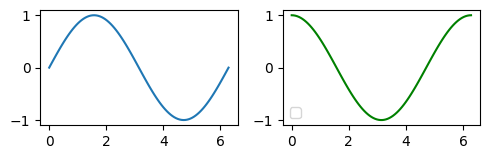

In [77]:
fig=plt.figure(figsize=(5,3),label='xx')

x=np.linspace(0,2*np.pi,num=100)
y=np.sin(x)

ax1=plt.subplot(221)
ax1.plot(x,y)

ax2=plt.subplot(222)
ax2.plot(x,np.cos(x),'g')

plt.legend()
fig.tight_layout()

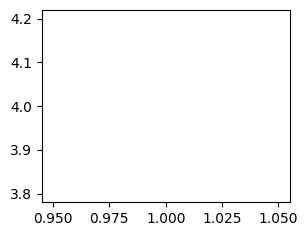

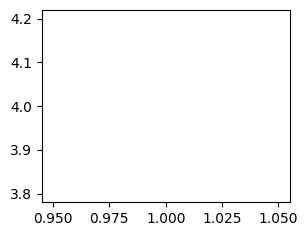

In [114]:
class Animator(object):
    def __init__(self,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,xscale='linear'
                 ,yscale='linear',fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1
                 ,figsize=(3.2,2.5)):
        if legend is None:
            legend=[]
    ##subplot会返回fig和ax对象
# Figure 是画布：想象你要创作一幅画，首先需要一块画布（Figure），它决定了画的整体大小和背景。
# Axes 是画纸：在画布上，你可以贴多张画纸（Axes），每张画纸上绘制不同的内容（如折线图、柱状图）。
        self.fig,self.axes=plt.subplots(nrows,ncols,figsize=figsize)
        if nrows*ncols==1:
            self.axes=[self.axes]

        self.X,self.Y,self.fmts=None,None,fmts
    ##Lambda函数要求只能有一个表达式，而此处通过元组将多个方法调用合并为一个表达式，符合语法规则。
        self.config_axes = lambda: (
            self.axes[0].set_xlabel(xlabel),                # 设置X轴标签
            self.axes[0].set_ylabel(ylabel),                # 设置Y轴标签
            self.axes[0].set_xlim(*xlim) if xlim else None,  # 设置X轴范围（如 xlim=(0, 10)）
            self.axes[0].set_ylim(*ylim) if ylim else None,  # 设置Y轴范围
            self.axes[0].set_xscale(xscale),                # 设置X轴刻度类型（如 'linear', 'log'）
            self.axes[0].set_yscale(yscale),                # 设置Y轴刻度类型
            self.axes[0].legend(legend) if legend else None # 显示图例（legend为图例参数，如 loc='best'）
            )
    def add(self,x,y):
###hasattr 动态检查一个对象是否包含指定属性或方法
        if not hasattr(y,'__len__'):
            y=[y]
        n=len(y)
        if not hasattr(x,'__len__'):
            x=[x]*n
        if not self.X:
            self.X=[[] for _ in range(n)]
        if not self.Y:
            self.Y=[[] for _ in range(n)]
        for i,(a,b) in enumerate(zip(x,y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        self.config_axes()
        for x,y,fmt in zip(self.X,self.Y,self.fmts):
            self.axes[0].plot(x,y,fmt)
        
        display.display(self.fig)
        # display.clear_output(wait=True)
        

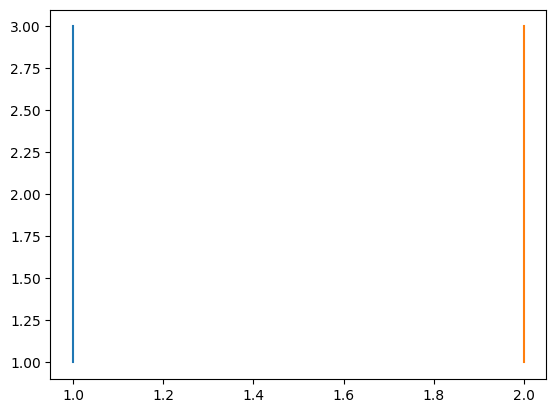

In [121]:
x=[[1,2],[1,2],[1,2]]
y=[[3,3],[2,2],[1,1]]
plt.plot(x,y)

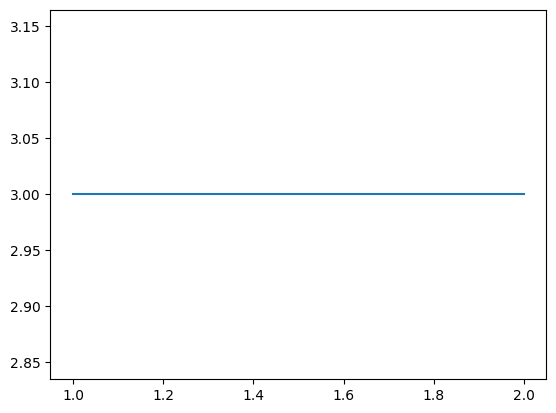

In [122]:
x=[1,2]
y=[3,3]
plt.plot(x,y)